1. Loading your friend's data into a dictionary
Netflix! What started in 1997 as a DVD rental service has since exploded into the largest entertainment/media company by market capitalization, boasting over 200 million subscribers as of January 2021.

Given the large number of movies and series available on the platform, it is a perfect opportunity to flex our data manipulation skills and dive into the entertainment industry. Our friend has also been brushing up on their Python skills and has taken a first crack at a CSV file containing Netflix data. For their first order of business, they have been performing some analyses, and they believe that the average duration of movies has been declining.

As evidence of this, they have provided us with the following information. For the years from 2011 to 2020, the average movie durations are 103, 101, 99, 100, 100, 95, 95, 96, 93, and 90, respectively.

If we're going to be working with this data, we know a good place to start would be to probably start working with pandas. But first we'll need to create a DataFrame from scratch. 

In [188]:
years = [2011,2012,2013,2014,2015,2016,2017,2018,2019,2020]
durations = [103,101,99,100,100,95,95,96,93,90]

In [189]:
movie_dict = {'years':years,'durations':durations}
print (movie_dict)

{'years': [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020], 'durations': [103, 101, 99, 100, 100, 95, 95, 96, 93, 90]}


In [190]:
import pandas as pd

2. Creating a DataFrame from a dictionary
To convert our dictionary movie_dict to a pandas DataFrame, we will first need to import the library under its usual alias. We'll also want to inspect our DataFrame to ensure it was created correctly. Let's perform these steps now.

In [191]:
durations_df = pd.DataFrame(movie_dict)
print(durations_df)

   years  durations
0   2011        103
1   2012        101
2   2013         99
3   2014        100
4   2015        100
5   2016         95
6   2017         95
7   2018         96
8   2019         93
9   2020         90


3. A visual inspection of our data
Alright, we now have a pandas DataFrame, the most common way to work with tabular data in Python. Now back to the task at hand. We want to follow up on our friend's assertion that movie lengths have been decreasing over time. A great place to start will be a visualization of the data.

Given that the data is continuous, a line plot would be a good choice, with the dates represented along the x-axis and the average length in minutes along the y-axis. This will allow us to easily spot any trends in movie durations. There are many ways to visualize data in Python, but matploblib.pyplot is one of the most common packages to do so.

Note: In order for us to correctly test your plot, you will need to initalize a matplotlib.pyplot Figure object, which we have already provided in the cell below. 

In [192]:
import matplotlib.pyplot as plt

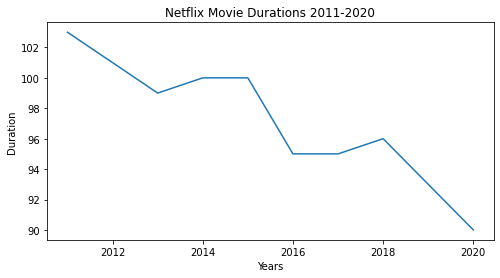

In [193]:
fig = plt.figure(figsize=( 8, 4))
plt.plot(durations_df['years'],durations_df['durations'])
plt.title('Netflix Movie Durations 2011-2020')
plt.xlabel('Years')
plt.ylabel('Duration')
plt.show()

4. Loading the rest of the data from a CSV
Well, it looks like there is something to the idea that movie lengths have decreased over the past ten years! But equipped only with our friend's aggregations, we're limited in the further explorations we can perform. There are a few questions about this trend that we are currently unable to answer, including:

What does this trend look like over a longer period of time?
Is this explainable by something like the genre of entertainment?
Upon asking our friend for the original CSV they used to perform their analyses, they gladly oblige and send it. We now have access to the CSV file, available ". Let's create another DataFrame, this time with all of the data. Given the length of our friend's data, printing the whole DataFrame is probably not a good idea, so we will inspect it by printing only the first five rows.

In [194]:
netflix_df = pd.read_csv('netflix_data.csv')
netflix_df.shape


(7787, 11)

In [195]:
netflix_df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,4,In a future where the elite inhabit an island ...,International TV
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas


5. Filtering for movies!
Okay, we have our data! Now we can dive in and start looking at movie lengths.

Or can we? Looking at the first five rows of our new DataFrame, we notice a column type. Scanning the column, it's clear there are also TV shows in the dataset! Moreover, the duration column we planned to use seems to represent different values depending on whether the row is a movie or a show (perhaps the number of minutes versus the number of seasons)?

Fortunately, a DataFrame allows us to filter data quickly, and we can select rows where type is Movie. While we're at it, we don't need information from all of the columns, so let's create a new DataFrame netflix_movies containing only title, country, genre, release_year, and duration.


In [196]:
netflix_df_movies_only = netflix_df[netflix_df['type']=='Movie']
netflix_df_movies_only.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies


In [197]:
#netflix_movies_col_subset = netflix_df_movies_only.drop(['show_id','director','cast','date_added','description'], axis=1)
netflix_movies_col_subset = netflix_df_movies_only[['title','country','genre','release_year','duration']]
netflix_movies_col_subset.head(20)

,title,country,genre,release_year,duration
1,7:19,Mexico,Dramas,2016,93
2,23:59,Singapore,Horror Movies,2011,78
3,9,United States,Action,2009,80
4,21,United States,Dramas,2008,123
6,122,Egypt,Horror Movies,2019,95
7,187,United States,Dramas,1997,119
8,706,India,Horror Movies,2019,118
9,1920,India,Horror Movies,2008,143
10,1922,United States,Dramas,2017,103
13,"2,215",Thailand,Documentaries,2018,89


In [198]:
netflix_movies_col_subset.shape

(5377, 5)

6. Creating a scatter plot
Okay, now we're getting somewhere. We've read in the raw data, selected rows of movies, and have limited our DataFrame to our columns of interest. Let's try visualizing the data again to inspect the data over a longer range of time.

This time, we are no longer working with aggregates but instead with individual movies. A line plot is no longer a good choice for our data, so let's try a scatter plot instead. We will again plot the year of release on the x-axis and the movie duration on the y-axis.



In [199]:
fig = plt.figure(figsize =(12,8))

<Figure size 864x576 with 0 Axes>

Text(0, 0.5, 'Movie Duration')

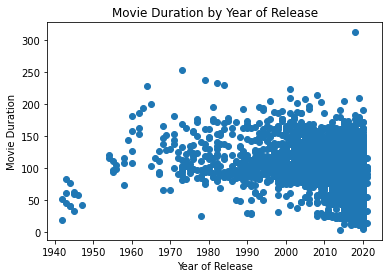

In [200]:
plt.scatter(netflix_movies_col_subset['release_year'],netflix_movies_col_subset['duration'])
plt.title("Movie Duration by Year of Release")
plt.xlabel("Year of Release")
plt.ylabel("Movie Duration")

7. Digging deeper
This is already much more informative than the simple plot we created when our friend first gave us some data. We can also see that, while newer movies are overrepresented on the platform, many short movies have been released in the past two decades.

Upon further inspection, something else is going on. Some of these films are under an hour long! Let's filter our DataFrame for movies with a duration under 60 minutes and look at the genres. This might give us some insight into what is dragging down the average.

In [201]:
short_movies = netflix_movies_col_subset[netflix_movies_col_subset['duration']<60]
short_movies.head()

,title,country,genre,release_year,duration
35,#Rucker50,United States,Documentaries,2016,56
55,100 Things to do Before High School,United States,Uncategorized,2014,44
67,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,Uncategorized,2017,37
101,3 Seconds Divorce,Canada,Documentaries,2018,53
146,A 3 Minute Hug,Mexico,Documentaries,2019,28


8. Marking non-feature films
Interesting! It looks as though many of the films that are under 60 minutes fall into genres such as "Children", "Stand-Up", and "Documentaries". This is a logical result, as these types of films are probably often shorter than 90 minute Hollywood blockbuster.

We could eliminate these rows from our DataFrame and plot the values again. But another interesting way to explore the effect of these genres on our data would be to plot them, but mark them with a different color.

In Python, there are many ways to do this, but one fun way might be to use a loop to generate a list of colors based on the contents of the genre column. Much as we did in Intermediate Python, we can then pass this list to our plotting function in a later step to color all non-typical genres in a different color!

Note: Although we are using the basic colors of red, blue, green, and black, matplotlib has many named colors you can use when creating plots. For more information, you can refer to the documentation here!

In [202]:
colors = []

In [203]:
for k,v in netflix_movies_col_subset.iterrows():
    if  v['genre'] == 'Children':
        colors.append('red')
    elif v['genre'] =='Documentaries':
        colors.append('blue')
    elif  v['genre'] =='Stand-up':
        colors.append('green')
    else:
        colors.append('black')
        

In [204]:
print(colors[0:10])

['black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'blue']


9. Plotting with color!
 We now have a colors list that we can pass to our scatter plot, which should allow us to visually inspect whether these genres might be responsible for the decline in the average duration of movies.

This time, we'll also spruce up our plot with some additional axis labels and a new theme with plt.style.use(). 

Text(0, 0.5, 'Duration (min)')

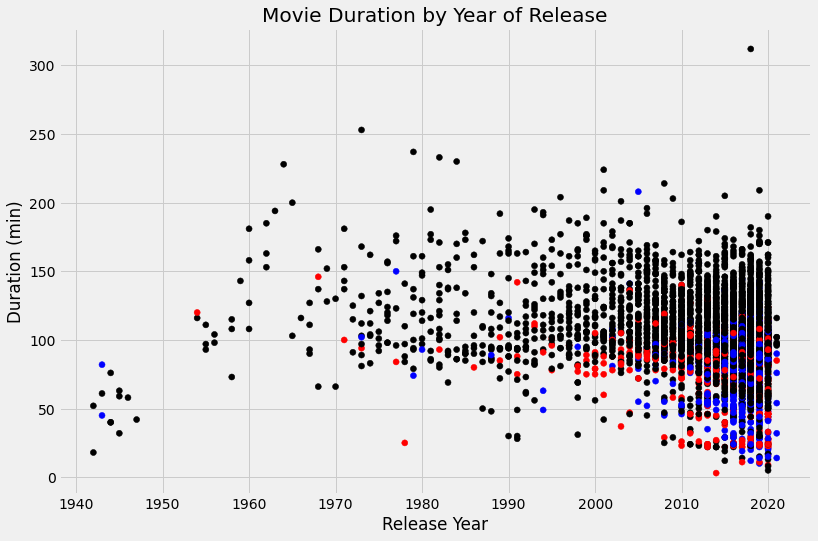

In [207]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(12,8))
plt.scatter(netflix_movies_col_subset['release_year'],netflix_movies_col_subset['duration'], c=colors)
plt.title("Movie Duration by Year of Release")
plt.xlabel("Release Year")
plt.ylabel("Duration (min)")

Well, as we suspected, non-typical genres such as children's movies and documentaries are all clustered around the bottom half of the plot. But we can't know for certain until we perform additional analyses.

In [208]:
are_movies_getting_shorter = 'No, we need more analyses'